In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
import random
random.seed(42)
from project1 import defs

train_feature_matrix: pd.DataFrame = defs.load_asset_value("train_feature_matrix")

2024-04-07 20:37:43 -0700 - dagster - DEBUG - system - Loading file from: /home/maguire/ucla/ece219/project1/project1/../data/train_feature_matrix using PickledObjectFilesystemIOManager...


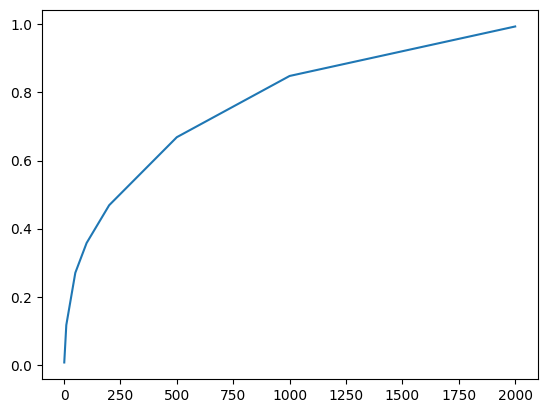

In [2]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
k_options = [1,10,50,100,200,500,1000,2000]

LSI_AOA = []
svd_50 = None
for k in k_options:
  svd = TruncatedSVD(n_components=k, random_state=42)
  svd.fit(train_feature_matrix)
  if k == 50:
    svd_50 = svd
  LSI_AOA.append(svd.explained_variance_ratio_.sum())

plt.plot(k_options, LSI_AOA)

In [3]:
from sklearn.decomposition import NMF
nmf_50 = NMF(n_components=50, init='random', random_state=42)
nmf_50.fit(train_feature_matrix)

NMF(init='random', n_components=50, random_state=42)

In [4]:
svd_50.components_.shape

(50, 14532)

In [5]:
nmf_50.components_.shape

(50, 14532)

In [6]:
svd_reduced = svd_50.transform(train_feature_matrix)
nmf_reduced = nmf_50.transform(train_feature_matrix)
svd_reduced.shape

(2780, 50)

In [7]:
from numpy.linalg import norm
import numpy as np
svd_mse = norm(train_feature_matrix - (svd_reduced @ svd_50.components_), 'fro')
nmf_mse = norm(train_feature_matrix - (nmf_reduced @ nmf_50.components_), 'fro')

In [8]:
print("MSE for SVD (LSI) dimension reduction: ")
print(svd_mse)
print("MSE for NMF dimension reduction: ")
print(nmf_mse)

MSE for SVD (LSI) dimension reduction: 
44.337470916478466
MSE for NMF dimension reduction: 
44.688434655986086
